In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns

# Load the dataset
df = pd.read_csv("dataset.csv")
df.head()    

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,categories
0,169,5.615,65.281,3.230,0,7.977,8.969,0,"b,a,c"
1,476,7.044,73.319,9.081,0,23.009,7.197,0,"c,a,d"
2,152,5.607,60.038,2.864,2,23.019,7.424,0,"d,a"
3,293,9.346,64.719,2.797,2,28.066,1.256,0,d
4,10,7.969,NaN,5.407,1,29.140,0.274,0,"c,d"


In [170]:
# Take ... as the target value and see the counts for each value
df['target'] = df['yield']
#df.target.value_counts()
#df.target.value_counts()/len(df)
df.describe()

,id,water,uv,area,fertilizer_usage,yield,pesticides,region,target
count,1000.000000,958.000000,949.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,12.223546,73.957488,8.098848,2.12300,58.758571,3.452301,3.039000,58.758571
std,288.819436,172.335566,9.904063,2.692632,1.52256,24.563683,2.076921,1.883886,24.563683
min,0.000000,0.072000,45.264000,0.263000,0.00000,2.843000,0.014000,0.000000,2.843000
25%,249.750000,4.584750,66.502000,6.297000,1.00000,40.698000,1.804500,2.000000,40.698000
50%,499.500000,6.476000,73.689000,7.987500,2.00000,55.602500,3.275500,2.000000,55.602500
75%,749.250000,8.758750,80.554000,9.900250,3.00000,73.645500,4.916000,5.000000,73.645500
max,999.000000,5340.000000,106.310000,18.311000,5.00000,148.845000,9.532000,6.000000,148.845000


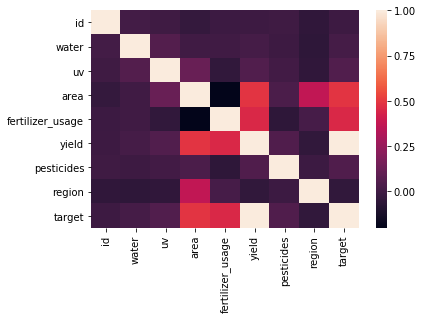

In [171]:
# Check the correlation between each variable
%matplotlib inline
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [172]:
# Represent the numerical variables and catogorical variables
id_col = ['id']
num_col = ['water', 'uv', 'area', 'pesticides']
cat_col = ['region', 'fertilizer_usage']
target = ['target']
feature = ['area','fertilizer_usage']
# check the columns with NaN values
df.isnull().any()

id                  False
water                True
uv                   True
area                False
fertilizer_usage    False
yield               False
pesticides          False
region              False
categories          False
target              False
dtype: bool

In [173]:
# Identify and flag missing values
for var in (num_col + cat_col):
    if df[var].isnull().any()==True:
        df[var+'_NA']=df[var].isnull()*1 
        
for i in num_col:
    df[i].fillna(df[i].mean(),inplace=True)
#sns.pairplot(df)
#sns.distplot(df['target'])

In [174]:
from sklearn import linear_model
# Check all the results for different models
model = [
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]

# Record the best result and model
best_m = ''
best_r2 = -100

for lm in model:
    # fit the model using traning data nad predict using the test datatet
    lm.fit(X_train,y_train)
    predictions = lm.predict(X_test)
    #plt.scatter(y_test,predictions)
    
    # Calculate the rmse for the evaluation of the model
    mse = np.sum((predictions - y_test)**2)
    rmse = np.sqrt(mse/400)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', lm.score(X_test, y_test))
    
    # Get the best model
    if lm.score(X_test, y_test) > best_r2:
        best_m = lm
        best_r2 = lm.score(X_test, y_test)
    print()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Root mean squared error:  17.116540631803645
R2 score:  0.5481980786048356

Root mean squared error:  16.979447777856837
R2 score:  0.5554064007116577

Root mean squared error:  25.47816209229572
R2 score:  -0.0010419448877152515

Root mean squared error:  16.978784176745116
R2 score:  0.5554411517878157

Root mean squared error:  42.4608217249803
R2 score:  -1.7803077611418536

Root mean squared error:  17.17837192502155
R2 score:  0.5449280307174134

Root mean squared error:  16.975540928658802
R2 score:  0.5556109727729538



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Slope: [5.4686677 8.9462647]
Intercept: -4.587052511943611
Root mean squared error:  16.975540928658802
R2 score:  0.5556109727729538


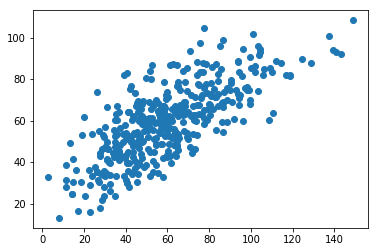

In [175]:
# Print the best result
best_m.fit(X_train,y_train)
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

mse = np.sum((predictions - y_test)**2)
rmse = np.sqrt(mse/400)

print('Slope:', lm.coef_)
print('Intercept:', lm.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', lm.score(X_test, y_test))